In [1]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
import configparser
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [2]:
config = configparser.ConfigParser()
config.read("/kaggle/input/config-file/config.ini")

['config.ini']

In [3]:
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

In [4]:
auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [5]:
db = pd.DataFrame(columns=['user_name',
                           'user_location',
                           'user_description',
                           'user_followers',
                           'date',
                           'text',
                           'hashtags',
                           'retweetcount'])

tweets = tweepy.Cursor(api.search_tweets,
                       'Rafael Nadal', lang="en",
                       tweet_mode='extended').items(9000)

list_tweets = [tweet for tweet in tweets]

i = 1

for tweet in list_tweets:
        user_name = tweet.user.screen_name
        user_location = tweet.user.location
        user_description = tweet.user.description  
        user_followers = tweet.user.followers_count   
        date = tweet.created_at
        text = tweet.full_text
        hashtags = tweet.entities['hashtags']
        retweetcount = tweet.retweet_count

        ith_tweet = [user_name, user_location,
                     user_description, user_followers,
                     date, text,
                     hashtags, retweetcount]
        db.loc[len(db)] = ith_tweet

filename = '/kaggle/input/rafael-nadal-twitter-dataset/rafaelnadal_tweets.csv'

db.to_csv(filename)

In [6]:
df = pd.read_csv('/kaggle/input/rafael-nadal-twitter-dataset/rafaelnadal_tweets.csv')
df.head()

,user_name,user_location,user_description,user_followers,date,text,hashtags,retweetCount
0,Nong Nhat Minh,NaN,NaN,20,08-06-2022 17:02,@DappCensus Nice project. @linhair8 @LongAirdr...,"['dappcensus', 'Airdrop', 'BNB', 'giveaway', '...",637
1,Peter Ndoro,Africa,Broadcast Journalist | This is not a News Feed...,279853,08-06-2022 16:52,The champions are being born everyday. They ar...,NaN,302
2,Gurpreet Singh,Mansa,https://t.co/2zAmCdu2Jh,61,08-06-2022 16:43,@DappCensus 🤩\n Successful in 2022\nBig profit...,NaN,0
3,💯 Earning Tips💰💰,"Dhaka, Bangladesh",ARKERARMY💪,115,08-06-2022 16:39,@DappCensus This is very huge and great projec...,NaN,23781
4,ahs,universe,a common man.,35,08-06-2022 16:35,@neeteshb @RajKumarMUFC @87vintage @nadalprop ...,['Djokovic'],13067


In [7]:
df.shape

(8286, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 8286 entries, 0 to 8285

Data columns (total 8 columns):

 #   Column            Non-Null Count  Dtype 

---  ------            --------------  ----- 

 0   user_name         8286 non-null   object

 1   user_location     5853 non-null   object

 2   user_description  7405 non-null   object

 3   user_followers    8286 non-null   int64 

 4   date              8286 non-null   object

 5   text              8286 non-null   object

 6   hashtags          6586 non-null   object

 7   retweetCount      8286 non-null   int64 

dtypes: int64(2), object(6)

memory usage: 518.0+ KB


In [9]:
df['date'] = pd.to_datetime(df['date'],format="%d-%m-%Y %H:%M")
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 8286 entries, 0 to 8285

Data columns (total 8 columns):

 #   Column            Non-Null Count  Dtype         

---  ------            --------------  -----         

 0   user_name         8286 non-null   object        

 1   user_location     5853 non-null   object        

 2   user_description  7405 non-null   object        

 3   user_followers    8286 non-null   int64         

 4   date              8286 non-null   datetime64[ns]

 5   text              8286 non-null   object        

 6   hashtags          6586 non-null   object        

 7   retweetCount      8286 non-null   int64         

dtypes: datetime64[ns](1), int64(2), object(5)

memory usage: 518.0+ KB


In [10]:
df.head()

,user_name,user_location,user_description,user_followers,date,text,hashtags,retweetCount
0,Nong Nhat Minh,NaN,NaN,20,2022-06-08 17:02:00,@DappCensus Nice project. @linhair8 @LongAirdr...,"['dappcensus', 'Airdrop', 'BNB', 'giveaway', '...",637
1,Peter Ndoro,Africa,Broadcast Journalist | This is not a News Feed...,279853,2022-06-08 16:52:00,The champions are being born everyday. They ar...,NaN,302
2,Gurpreet Singh,Mansa,https://t.co/2zAmCdu2Jh,61,2022-06-08 16:43:00,@DappCensus 🤩\n Successful in 2022\nBig profit...,NaN,0
3,💯 Earning Tips💰💰,"Dhaka, Bangladesh",ARKERARMY💪,115,2022-06-08 16:39:00,@DappCensus This is very huge and great projec...,NaN,23781
4,ahs,universe,a common man.,35,2022-06-08 16:35:00,@neeteshb @RajKumarMUFC @87vintage @nadalprop ...,['Djokovic'],13067


In [11]:
df.describe()

,user_followers,retweetCount
count,8.286000e+03,8286.000000
mean,1.016901e+04,5927.665339
std,2.445845e+05,8069.822615
min,0.000000e+00,0.000000
25%,6.600000e+01,205.000000
50%,2.535000e+02,1750.000000
75%,1.061500e+03,10614.000000
max,1.444403e+07,100500.000000


In [12]:
pd.DatetimeIndex(df['date']).month.unique()

Int64Index([6, 5], dtype='int64', name='date')

### 1. What is the % growth in the tweet as compared to last month?

In [13]:
df['month'] = df['date'].dt.month
df.head()

,user_name,user_location,user_description,user_followers,date,text,hashtags,retweetCount,month
0,Nong Nhat Minh,NaN,NaN,20,2022-06-08 17:02:00,@DappCensus Nice project. @linhair8 @LongAirdr...,"['dappcensus', 'Airdrop', 'BNB', 'giveaway', '...",637,6
1,Peter Ndoro,Africa,Broadcast Journalist | This is not a News Feed...,279853,2022-06-08 16:52:00,The champions are being born everyday. They ar...,NaN,302,6
2,Gurpreet Singh,Mansa,https://t.co/2zAmCdu2Jh,61,2022-06-08 16:43:00,@DappCensus 🤩\n Successful in 2022\nBig profit...,NaN,0,6
3,💯 Earning Tips💰💰,"Dhaka, Bangladesh",ARKERARMY💪,115,2022-06-08 16:39:00,@DappCensus This is very huge and great projec...,NaN,23781,6
4,ahs,universe,a common man.,35,2022-06-08 16:35:00,@neeteshb @RajKumarMUFC @87vintage @nadalprop ...,['Djokovic'],13067,6


In [14]:
df.month.value_counts()

6    7077
5    1209
Name: month, dtype: int64

In [15]:
june = len(df[df.month==6])
may = len(df[df.month==5])
month_dict = {'May' : may, "June" : june}
month_dict

{'May': 1209, 'June': 7077}

0 May

1 June


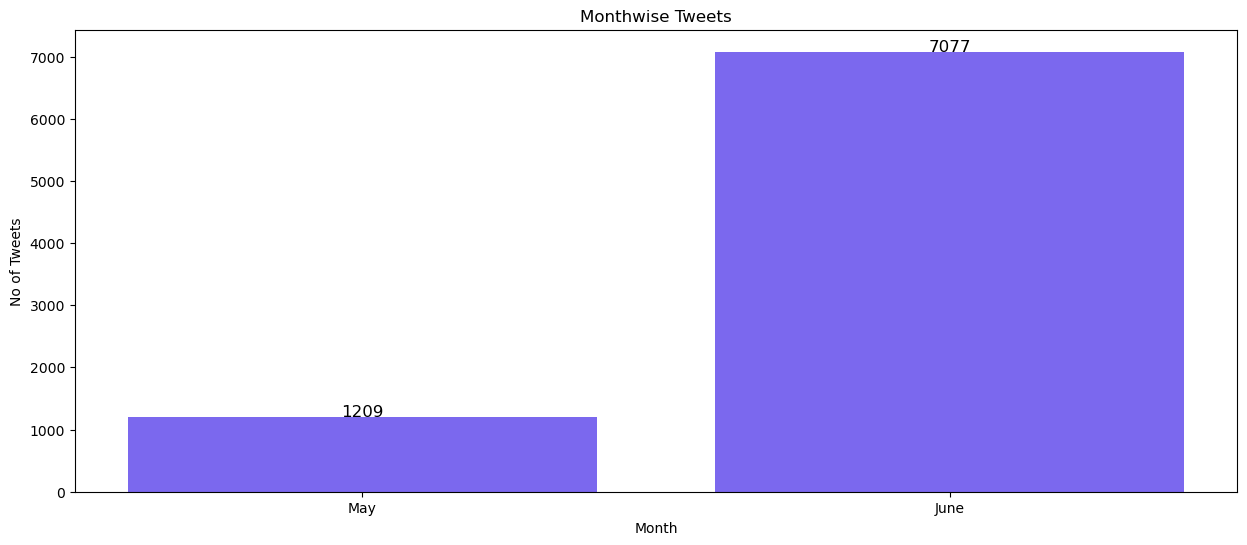

In [16]:
plt.figure(figsize=(15,6))
plt.bar(month_dict.keys(), month_dict.values(),color='mediumslateblue')

# set the axis labels and title
plt.xlabel('Month')
plt.ylabel('No of Tweets')
plt.title('Monthwise Tweets')

# rotate the x-axis labels for better visibility
for i, v in enumerate(month_dict):
    print(i,v)
    plt.text(v, month_dict[v]+0.4, str(round(month_dict[v],2)), fontsize=12, color='black', ha='center')
# show the plot
plt.show()

In [17]:
# Percent increase = [(new value - original value)/original value] × 100
percent_increase_in_june = (month_dict['June'] - month_dict['May'])/month_dict['May'] * 100
percent_increase_in_june

485.35980148883374

In [18]:
df_june = df[df.month==6]
df_june['day'] = df_june['date'].dt.day
df_june.day.value_counts()

C:\Users\amitb\anaconda3\envs\envv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  


5    3928
3    1404
6     559
1     520
7     257
8     179
4     159
2      71
Name: day, dtype: int64

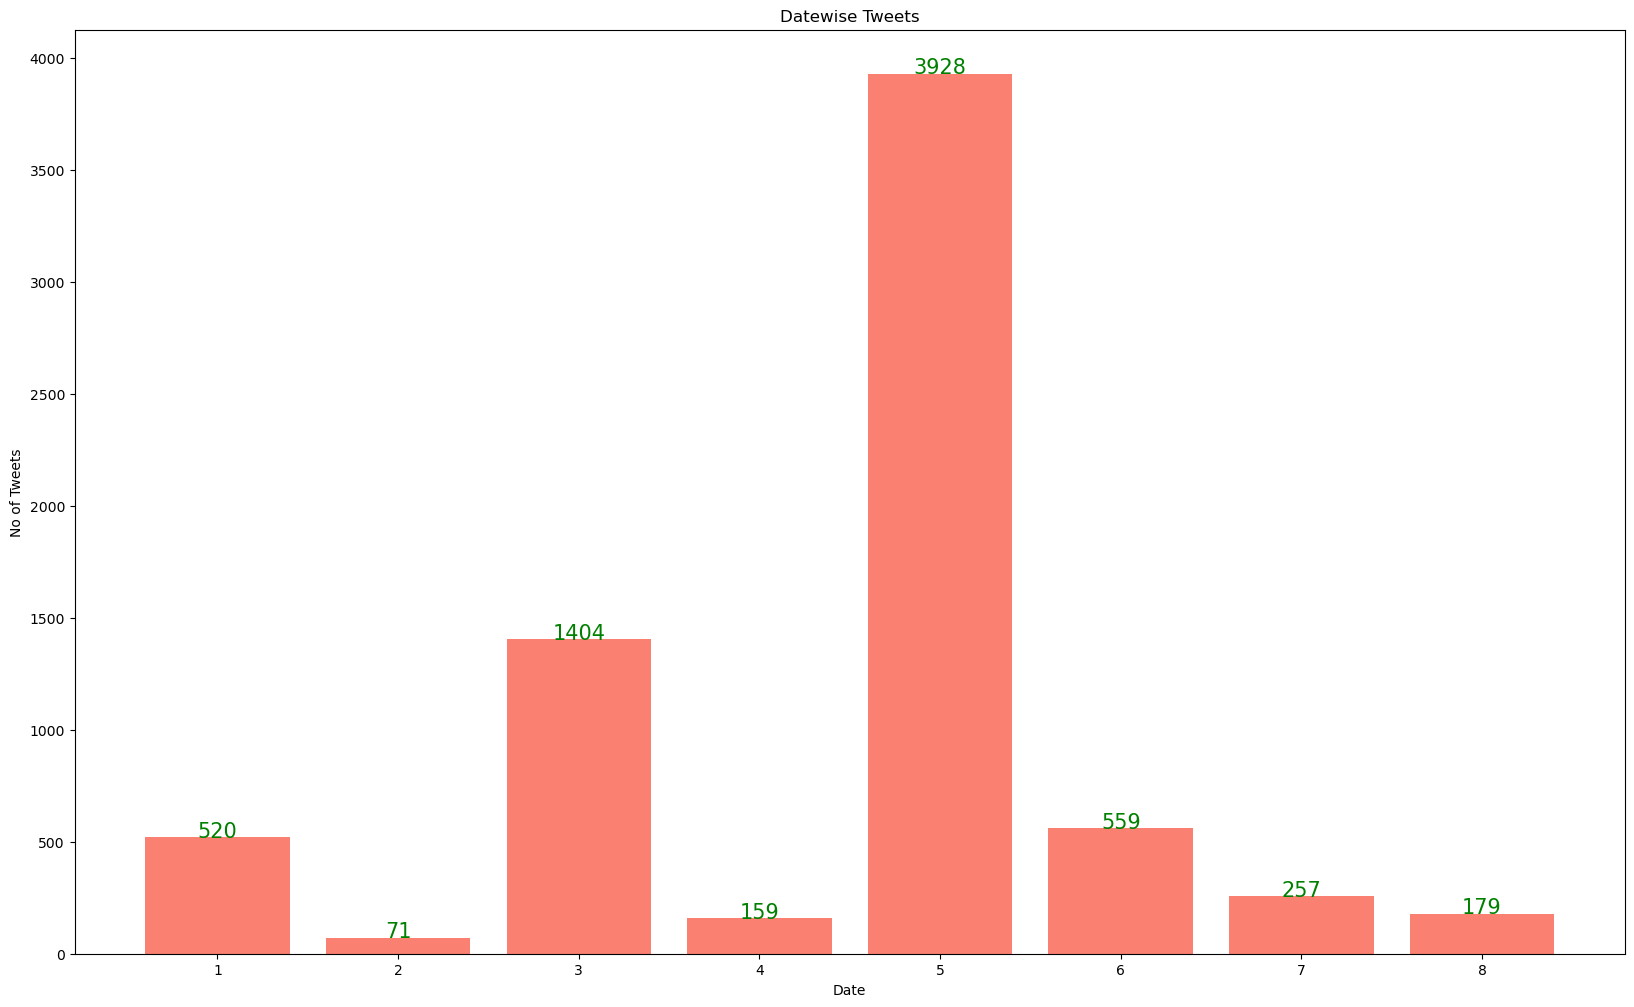

In [19]:
plt.figure(figsize=(20,12))
plt.bar(df_june.day.value_counts().index, df_june.day.value_counts().values,color="salmon")

# set the axis labels and title
plt.xlabel('Date')
plt.ylabel('No of Tweets')
plt.title('Datewise Tweets')

# rotate the x-axis labels for better visibility
for i, v in enumerate(df_june.day.value_counts().values):
    plt.text(df_june.day.value_counts().index[i], v+0.15, str(round(v,2)), fontsize=15, color='green', ha='center')

# show the plot
plt.show()

#### So the % growth in the tweet of June month as compared to May month is 485%. And maximum tweets are on the 5th June 2022 i.e. 3928 because Nadal won French Open on that day.

### 2. How many % of tweets were of positive sentiments?

In [20]:
def Clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '',text)
    text = re.sub(r'#', '',text)
    text = re.sub(r'RT[\s]+', '',text)
    text = re.sub(r'https?:\/\/\S+', '',text)
    return text

In [21]:
df['text'] = df['text'].apply(Clean_text)

In [22]:
df.head(100)

,user_name,user_location,user_description,user_followers,date,text,hashtags,retweetCount,month
0,Nong Nhat Minh,NaN,NaN,20,2022-06-08 17:02:00,Nice project. \ndappcensus Airdrop BNB giv...,"['dappcensus', 'Airdrop', 'BNB', 'giveaway', '...",637,6
1,Peter Ndoro,Africa,Broadcast Journalist | This is not a News Feed...,279853,2022-06-08 16:52:00,The champions are being born everyday. They ar...,NaN,302,6
2,Gurpreet Singh,Mansa,https://t.co/2zAmCdu2Jh,61,2022-06-08 16:43:00,🤩\n Successful in 2022\nBig profitable\n \n _...,NaN,0,6
3,💯 Earning Tips💰💰,"Dhaka, Bangladesh",ARKERARMY💪,115,2022-06-08 16:39:00,This is very huge and great project and team ...,NaN,23781,6
4,ahs,universe,a common man.,35,2022-06-08 16:35:00,With 50% GS on his surface 2 GS per year D...,['Djokovic'],13067,6
...,...,...,...,...,...,...,...,...,...
95,Calculator,NaN,Iam good💜,123,2022-06-08 09:50:00,Good project😍\n\n\n\n\ndappcensus Airdrop BNB...,"['dappcensus', 'Airdrop', 'BNB', 'giveaway']",1728,6
96,Calculator,NaN,Iam good💜,123,2022-06-08 09:49:00,Good project😍\n\n\n\n\ndappcensus Airdrop BNB...,"['dappcensus', 'Airdrop', 'BNB', 'giveaway']",2761,6
97,fvc,NaN,NaN,142,2022-06-08 09:48:00,This project looks very interesting. I am int...,NaN,2,6
98,Tatisuryati05,NaN,Airdrop crypto is the best,21,2022-06-08 09:37:00,Nice project with good token in world crypto ...,NaN,3141,6


In [23]:
def getsentimemts(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['text'].apply(getsentimemts)

In [24]:
df.head()

,user_name,user_location,user_description,user_followers,date,text,hashtags,retweetCount,month,polarity
0,Nong Nhat Minh,NaN,NaN,20,2022-06-08 17:02:00,Nice project. \ndappcensus Airdrop BNB giv...,"['dappcensus', 'Airdrop', 'BNB', 'giveaway', '...",637,6,0.600
1,Peter Ndoro,Africa,Broadcast Journalist | This is not a News Feed...,279853,2022-06-08 16:52:00,The champions are being born everyday. They ar...,NaN,302,6,-0.200
2,Gurpreet Singh,Mansa,https://t.co/2zAmCdu2Jh,61,2022-06-08 16:43:00,🤩\n Successful in 2022\nBig profitable\n \n _...,NaN,0,6,0.375
3,💯 Earning Tips💰💰,"Dhaka, Bangladesh",ARKERARMY💪,115,2022-06-08 16:39:00,This is very huge and great project and team ...,NaN,23781,6,0.664
4,ahs,universe,a common man.,35,2022-06-08 16:35:00,With 50% GS on his surface 2 GS per year D...,['Djokovic'],13067,6,0.600


In [25]:
def getanalysis(score):
    if score < 0 :
        return "Negative"
    elif score == 0 :
        return "Neutral"
    else :
        return "Positive"

In [26]:
df['sentiment'] = df['polarity'].apply(getanalysis)

In [27]:
df.head()

,user_name,user_location,user_description,user_followers,date,text,hashtags,retweetCount,month,polarity,sentiment
0,Nong Nhat Minh,NaN,NaN,20,2022-06-08 17:02:00,Nice project. \ndappcensus Airdrop BNB giv...,"['dappcensus', 'Airdrop', 'BNB', 'giveaway', '...",637,6,0.600,Positive
1,Peter Ndoro,Africa,Broadcast Journalist | This is not a News Feed...,279853,2022-06-08 16:52:00,The champions are being born everyday. They ar...,NaN,302,6,-0.200,Negative
2,Gurpreet Singh,Mansa,https://t.co/2zAmCdu2Jh,61,2022-06-08 16:43:00,🤩\n Successful in 2022\nBig profitable\n \n _...,NaN,0,6,0.375,Positive
3,💯 Earning Tips💰💰,"Dhaka, Bangladesh",ARKERARMY💪,115,2022-06-08 16:39:00,This is very huge and great project and team ...,NaN,23781,6,0.664,Positive
4,ahs,universe,a common man.,35,2022-06-08 16:35:00,With 50% GS on his surface 2 GS per year D...,['Djokovic'],13067,6,0.600,Positive


([<matplotlib.patches.Wedge at 0x1b5b0f67188>,
 [Text(-0.15504504404049427, 1.0890183810746636, 'Positive'),
  Text(-0.14802265504658377, -1.089995088793046, 'Neutral'),
  Text(1.0582495456156478, -0.3001797781401595, 'Negative')],
 [Text(-0.08457002402208778, 0.5940100260407255, '54.50%\n(4516)'),
  Text(-0.08073963002540932, -0.5945427757052978, '36.70%\n(3041)'),
  Text(0.5772270248812623, -0.16373442444008698, '8.80%\n(729)')])

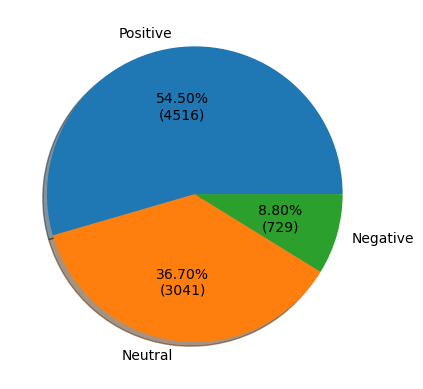

In [28]:
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

v_counts = df['sentiment'].value_counts()
total = len(df['sentiment'])
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=True)

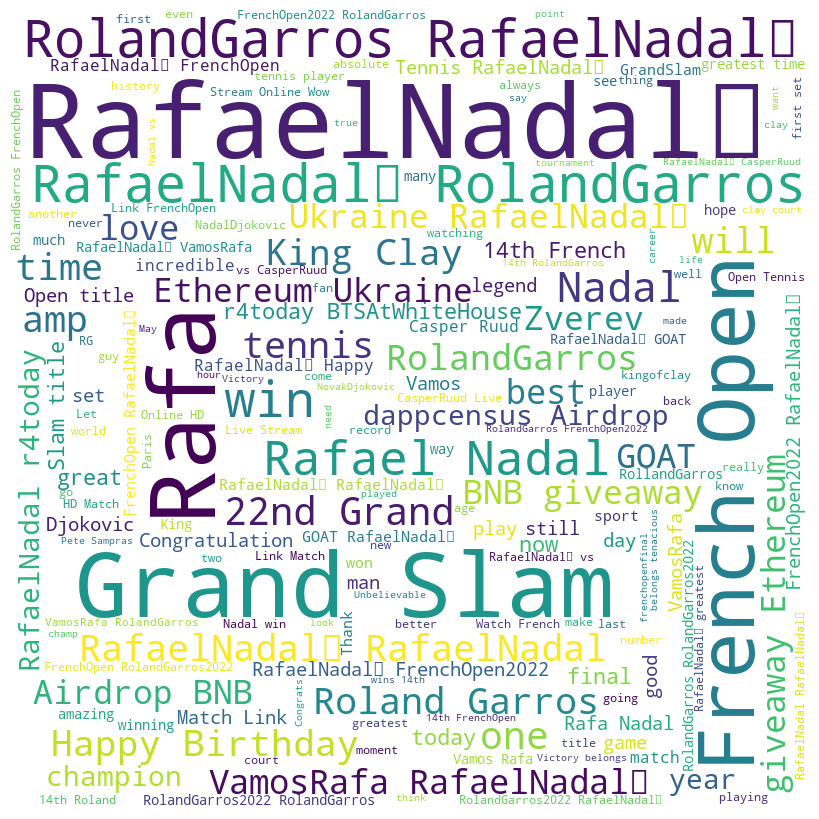

In [29]:
df_positive = df[df.sentiment=="Positive"]
words = ' '.join([text for text in df_positive['text']])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### From all extracted tweets, approx 55% tweets are positive sentiments and his name grand slam are mostly mentioned with praises and congratulations.

### 3. Top 5 most viral tweets (based upon retweets)

In [30]:
df_top5 = df.sort_values(by='retweetCount',ascending='False')[df.shape[0]-5:][::-1][['text','retweetCount']]
df_top5

,text,retweetCount
6835,"""He showed why he's a great champion,no doubt ...",100500
3575,Vamos !!! 14th RG and 22nd Grand Slam!!! Rafa...,66596
5555,Shot of the tournament Indeed!!🤯\nRafaelNadal𓃵...,46812
7084,Unbelievable match and great comeback from Raf...,46812
4519,Watch French Open Tennis🎾🎾\n\nRafaelNadal𓃵 v...,44008


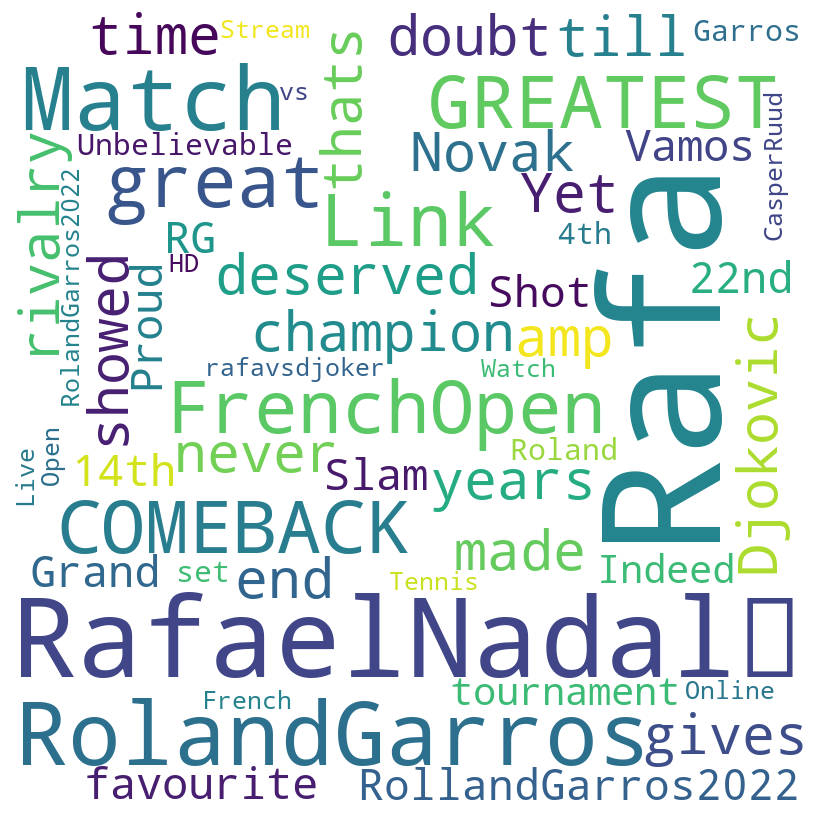

In [31]:
words = ' '.join([text for text in df_top5['text']])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### The above tweets are the top 5 most viral tweets (based upon retweets) and praises are all over for Refael Nadal.

### 4. How many influential people are talking about our product (whose followers are greater than 1000)

In [32]:
df_influential_people = df[df.user_followers > 1000][['user_name','user_followers']]
df_influential_people.shape

(2131, 2)

In [33]:
df_influential_people.head()

,user_name,user_followers
1,Peter Ndoro,279853
5,TroubleFault,5982
6,TroubleFault,5982
13,TroubleFault,5982
14,TroubleFault,5982


In [34]:
df_influential_people = df_influential_people.drop_duplicates(subset=['user_name'])
df_influential_people.shape

(1175, 2)

In [35]:
df_influential_people.head()

,user_name,user_followers
1,Peter Ndoro,279853
5,TroubleFault,5982
18,AlexCam,3147
22,🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana,1431
24,ᗩY ᗰ ᗩᑎ,1109


#### There are total 1175 influential people (whose followers are greater than 1000) are tweeted about Rafael Nadal.

### 5. Which geographical location has the most tweets?

In [36]:
df.user_location.value_counts()

India                          298
New Delhi, India               113
Mumbai, India                  109
Mumbai                          92
barcaelona                      78
                              ... 
Bhubaneswar                      1
Kolkata, West Bengal, India      1
Victoria, Australia              1
New Delhi , India                1
शिवभूमि                          1
Name: user_location, Length: 2109, dtype: int64

In [37]:
def get_country(location):
    try:
        if location is not None:         
            if ',' in location:
                location = location.split(',')[-1]
                location = location.strip()
        if 'Mumbai' in location:
            location = 'India'
        elif location == 'United Kingdom':
            location = 'England'
        elif location == 'barcaelona':
            location = 'Spain'
        elif location == 'NY' or location == 'CA':
            location = 'USA'
        return location
    except Exception as e:
        return location

In [38]:
df_tweet_location = df.user_location.apply(get_country)
df_tweet_location.value_counts()[:7]

India           1462
USA              242
England          213
Spain             89
South Africa      80
Pakistan          73
Canada            62
Name: user_location, dtype: int64

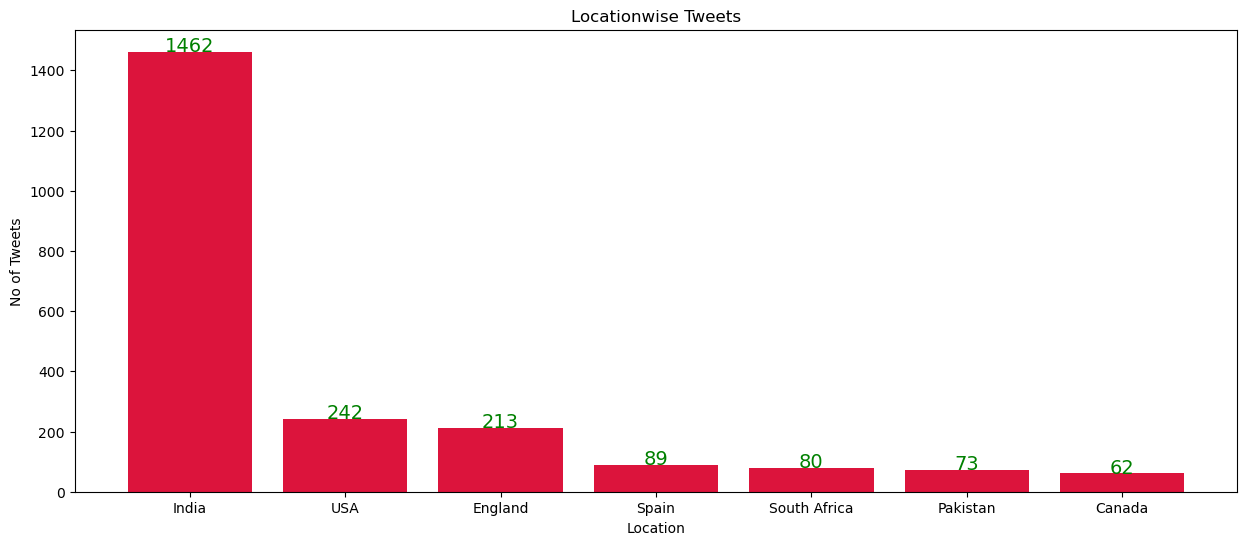

In [39]:
plt.figure(figsize=(15,6))
plt.bar(df_tweet_location.value_counts().index[:7], df_tweet_location.value_counts().values[:7],color='crimson')

# set the axis labels and title
plt.xlabel('Location')
plt.ylabel('No of Tweets')
plt.title('Locationwise Tweets')

# rotate the x-axis labels for better visibility
for i, v in enumerate(df_tweet_location.value_counts()[:7]):
    plt.text(df_tweet_location.index[i], v+0.4, str(round(v,2)), fontsize=14, color='green', ha='center')
# show the plot
plt.show()

#### Most tweets are from India and USA stands second with England as third.

### 6. what is the hashtag that appears most frequently and can be considered the most trending among the analyzed data?

In [40]:
def get_hashtags(hashtag_list):
    try:
        if hashtag_list is not None:
            hashtag_list = hashtag_list.split(',')
            for i in range(len(hashtag_list)):
                hashtag_list[i] = hashtag_list[i].replace('[','')
                hashtag_list[i] = hashtag_list[i].replace(']','')
                hashtag_list[i] = hashtag_list[i].replace("'",'')
                hashtag_list[i] = hashtag_list[i].replace("'",'')
                hashtag_list[i] = hashtag_list[i].replace("𓃵",'')
                hashtag_list[i] = hashtag_list[i].strip()
        text_join = ','.join(hashtag_list)
        return text_join
    except Exception as e:
        return ''

In [41]:
df['hashtags'] = df['hashtags'].apply(get_hashtags)
df['hashtags'].head()

0    dappcensus,Airdrop,BNB,giveaway,Ethereum
1                                            
2                                            
3                                            
4                                    Djokovic
Name: hashtags, dtype: object

In [42]:
df1=pd.DataFrame()
df1['hashtags'] = df['hashtags'].str.split(',')
# df1['hashtags'] = df1['hashtags'].fillna('')
df1.head()

,hashtags
0,"[dappcensus, Airdrop, BNB, giveaway, Ethereum]"
1,[]
2,[]
3,[]
4,[Djokovic]


In [43]:
df2 = pd.DataFrame(df1['hashtags'].tolist()).add_prefix('hashtags_')
df2

,hashtags_0,hashtags_1,hashtags_2,hashtags_3,hashtags_4,hashtags_5,hashtags_6,hashtags_7,hashtags_8,hashtags_9,hashtags_10
0,dappcensus,Airdrop,BNB,giveaway,Ethereum,None,None,None,None,None,None
1,,None,None,None,None,None,None,None,None,None,None
2,,None,None,None,None,None,None,None,None,None,None
3,,None,None,None,None,None,None,None,None,None,None
4,Djokovic,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8281,FrenchOpen,RolandGarros,RafaelNadal,NovakDjokovic,Tennis,ATP,None,None,None,None,None
8282,VamosRafa,RafaelNadal,DjokovicNadal,NovakDjokovic,None,None,None,None,None,None,None
8283,,None,None,None,None,None,None,None,None,None,None
8284,,None,None,None,None,None,None,None,None,None,None


In [44]:
df2.isnull().sum()

hashtags_0        0
hashtags_1     4074
hashtags_2     6299
hashtags_3     7419
hashtags_4     7879
hashtags_5     8072
hashtags_6     8196
hashtags_7     8236
hashtags_8     8258
hashtags_9     8279
hashtags_10    8285
dtype: int64

In [45]:
df3 = pd.Series(df2.values.ravel('F'))
df3.shape

(91146,)

In [46]:
df3.isnull().sum()

74997

In [47]:
df3 = df3.dropna()
df3.shape

(16149,)

In [48]:
a = df3.value_counts()
a.index

Index(['RafaelNadal', 'RolandGarros', '', 'FrenchOpen', 'VamosRafa',
       'FrenchOpen2022', 'RolandGarros2022', 'Nadal', 'GOAT', 'RollandGarros',
       ...
       'Alex', 'ATOBTTR', 'champ14n', 'PayPal', 'Kolkata', '1️⃣4️⃣',
       'Airdrops', 'Stopinsulting_ProphetMuhammad', 'SPAIN',
       'PlatinumJubileeconcert'],
      dtype='object', length=969)

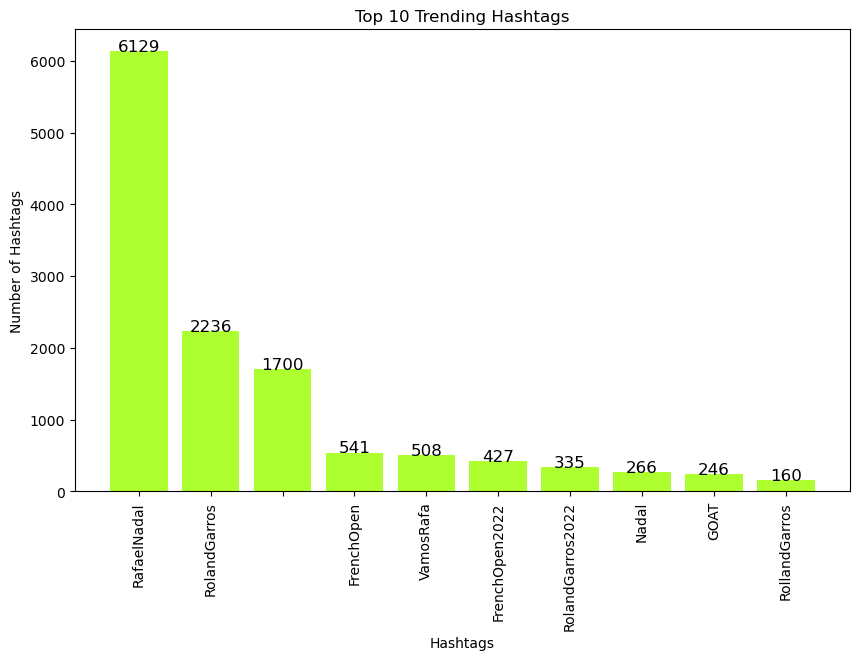

In [49]:
plt.figure(figsize=(10,6))
plt.bar(df3.value_counts()[:10].sort_values(ascending=False).index, df3.value_counts()[:10].sort_values(ascending=False).values,color="greenyellow")

# set the axis labels and title
plt.xlabel('Hashtags')
plt.ylabel('Number of Hashtags')
plt.title('Top 10 Trending Hashtags')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df3.value_counts()[:10].sort_values(ascending=False).values):
    plt.text(df3.value_counts()[:10].sort_values(ascending=False).index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')
# show the plot
plt.show()

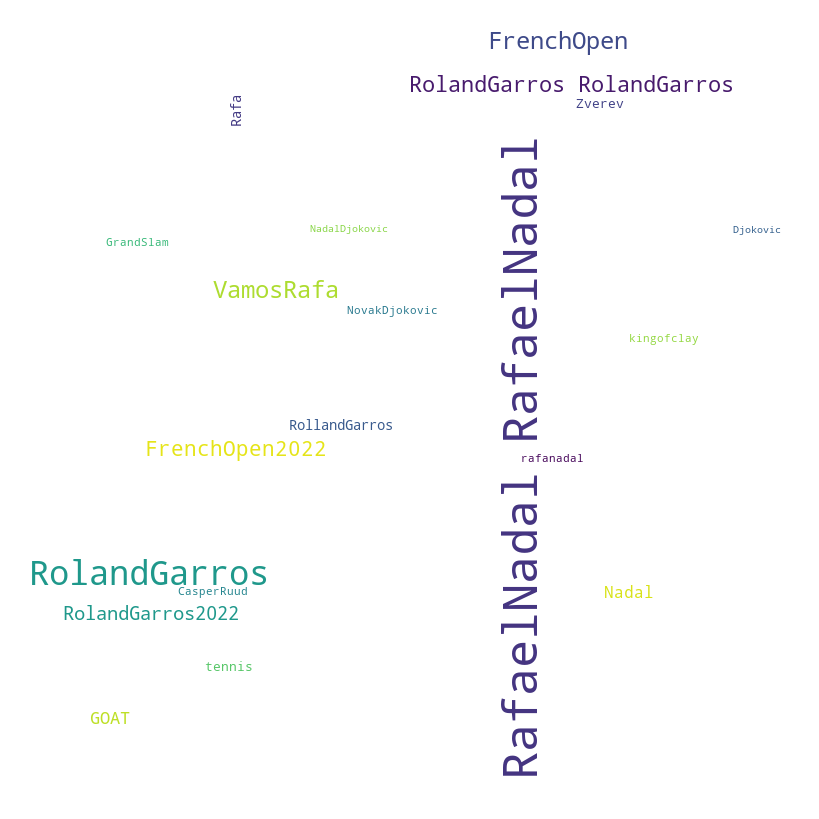

In [50]:
text = ''
for i in df3:
    value  = i
    value = value.strip()
    value = value.replace(" ","_")
    text = text + " " + value
    
text = text.strip()
wordcloud =  WordCloud(width = 800, height = 800, stopwords=stopwords, background_color="white", min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Clearly RafaelNadal is th most trending hashtag followed by RolandGarros which is the tennis tournament he played.

### 7. Which username has the most tweets?

In [51]:
df.user_name.value_counts()[:5]

🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana    78
X Games 2023 Live            72
Ruth😊☕🇺🇦                     47
Deepali NO DMs 🚫             46
Mowafak Alkawass (Mo)        42
Name: user_name, dtype: int64

C:\Users\amitb\anaconda3\envs\envv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127988 (\N{WAVING BLACK FLAG}) missing from current font.

  fig.canvas.print_figure(bytes_io, **kw)

C:\Users\amitb\anaconda3\envs\envv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 917607 (\N{TAG LATIN SMALL LETTER G}) missing from current font.

  fig.canvas.print_figure(bytes_io, **kw)

C:\Users\amitb\anaconda3\envs\envv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 917602 (\N{TAG LATIN SMALL LETTER B}) missing from current font.

  fig.canvas.print_figure(bytes_io, **kw)

C:\Users\amitb\anaconda3\envs\envv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 917619 (\N{TAG LATIN SMALL LETTER S}) missing from current font.

  fig.canvas.print_figure(bytes_io, **kw)

C:\Users\amitb\anaconda3\envs\envv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 917603 (\N{TAG LATIN SMALL LETTER C}) missing from 

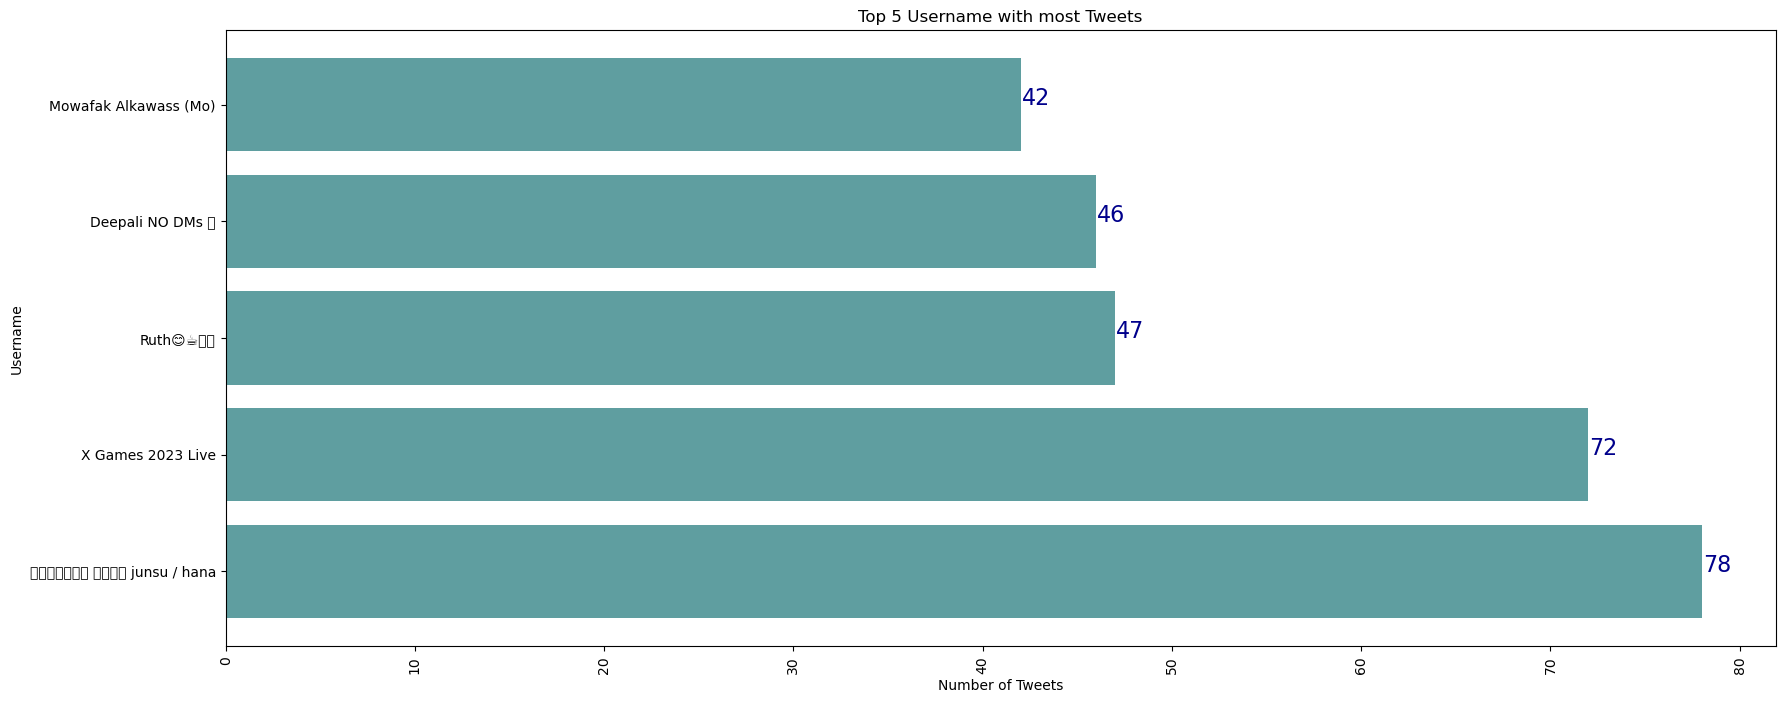

In [52]:
plt.figure(figsize=(20,8))
plt.barh(df.user_name.value_counts()[:5].index, df.user_name.value_counts()[:5].values,color="cadetblue")

# set the axis labels and title
plt.xlabel('Number of Tweets')
plt.ylabel('Username')
plt.title('Top 5 Username with most Tweets')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
# for i, v in enumerate(highest_values.values):
#     plt.text(highest_values.index[i], v+0.15, str(round(v,2)), fontsize=14, color='red', ha='center')
for i, v in enumerate( df.user_name.value_counts()[:5].values):
    plt.text(v+0.8, df.user_name.value_counts()[:5].index[i],str(round(v,2)), fontsize=16, color='darkblue', ha='center')
# show the plot
plt.show()

#### Username 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu/hana has tweeted most tweets while having username X Games 2023 Live is second on the list.

### 8. Analyze username with most tweets

##### Lets analyze 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana

In [53]:
df_user = df[df.user_name=='🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana']
df_user.head()

,user_name,user_location,user_description,user_followers,date,text,hashtags,retweetCount,month,polarity,sentiment
22,🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana,barcaelona,JYJBB BTS BARCA #AOT @fcbarcelona @RafaelNadal...,1431,2022-06-08 14:46:00,Lmfao last time someone accused rafa nadal of ...,RafaelNadal,1041,6,0.000000,Neutral
73,🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana,barcaelona,JYJBB BTS BARCA #AOT @fcbarcelona @RafaelNadal...,1431,2022-06-08 12:06:00,HAHAHHAHA DJOKOVIC FANS BEING SO PISSY AND EMB...,,5210,6,0.566667,Positive
117,🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana,barcaelona,JYJBB BTS BARCA #AOT @fcbarcelona @RafaelNadal...,1431,2022-06-08 08:39:00,And the haters will still talk shit because th...,RafaNadal,3866,6,-0.200000,Negative
374,🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana,barcaelona,JYJBB BTS BARCA #AOT @fcbarcelona @RafaelNadal...,1431,2022-06-07 12:48:00,Man they are still crying 🤣😭 RafaNadal RafaelN...,"RafaNadal,RafaelNadal",4914,6,-0.200000,Negative
375,🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana,barcaelona,JYJBB BTS BARCA #AOT @fcbarcelona @RafaelNadal...,1431,2022-06-07 12:43:00,Karma is getting you all good after all that t...,RafaelNadal,9264,6,0.700000,Positive


In [54]:
df_user.shape

(78, 11)

In [55]:
df_user['user_description'][22]

'JYJBB BTS BARCA #AOT @fcbarcelona @RafaelNadal @serenawilliams #FUCKSM , @warriors @f1 @celtic , Anime'

In [56]:
df_user['date'].dt.date.value_counts().sort_index()

2022-05-31     1
2022-06-01     1
2022-06-02     1
2022-06-03    19
2022-06-05    49
2022-06-06     2
2022-06-07     2
2022-06-08     3
Name: date, dtype: int64

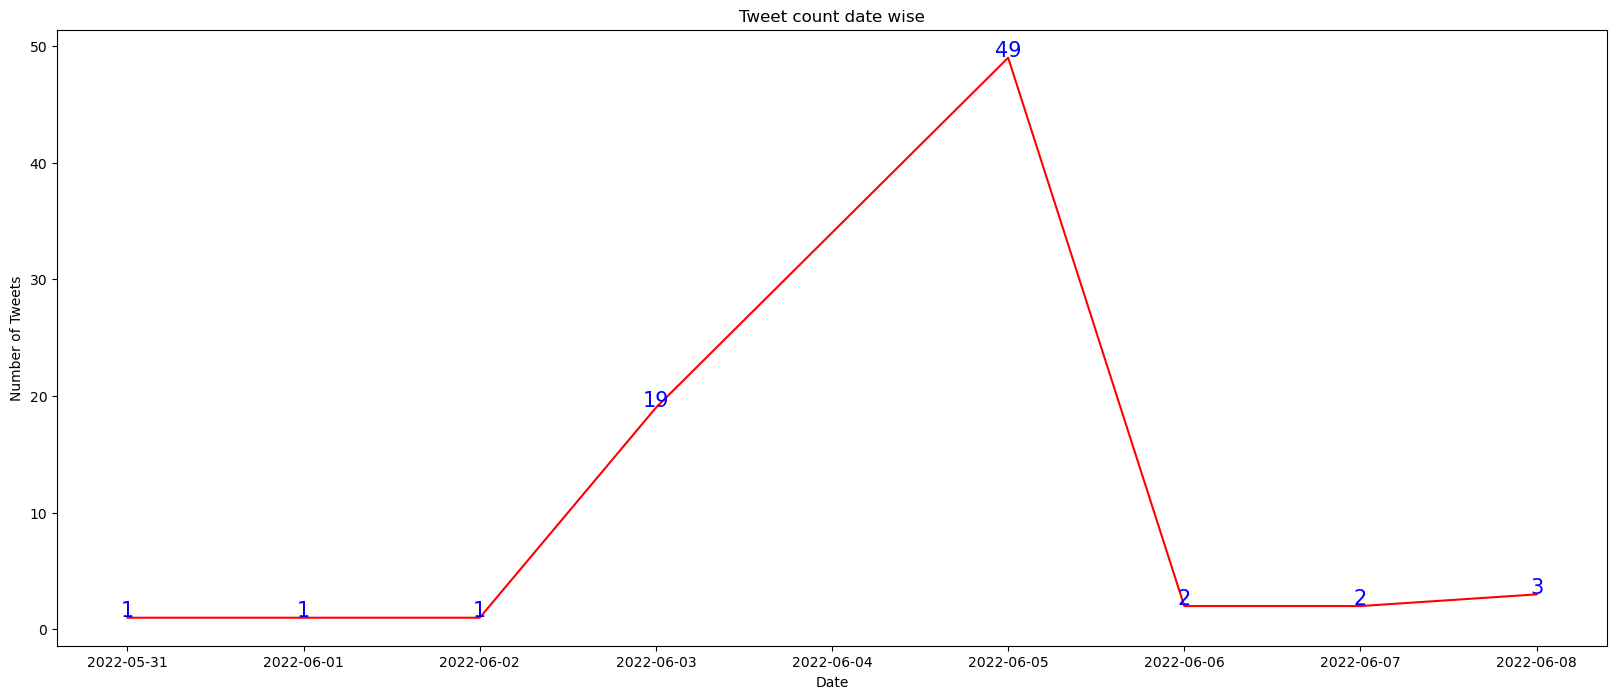

In [57]:
plt.figure(figsize=(20,8))
plt.plot(df_user['date'].dt.date.value_counts().sort_index().index, df_user['date'].dt.date.value_counts().sort_index().values, color="red")

plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Tweet count date wise')

for x, y in zip(df_user['date'].dt.date.value_counts().sort_index().index, df_user['date'].dt.date.value_counts().sort_index().values):
    y= round(int(y),2)
    plt.text(x, y+0.1, str(y), ha='center',color='blue',fontsize=15)

In [58]:
df_retweets = df_user['retweetCount'][::-1]
df_retweets.set_axis(range(1, len(df_retweets) + 1), inplace=True)
df_retweets.head()

1        4
2    14305
3       42
4     3551
5     2098
Name: retweetCount, dtype: int64

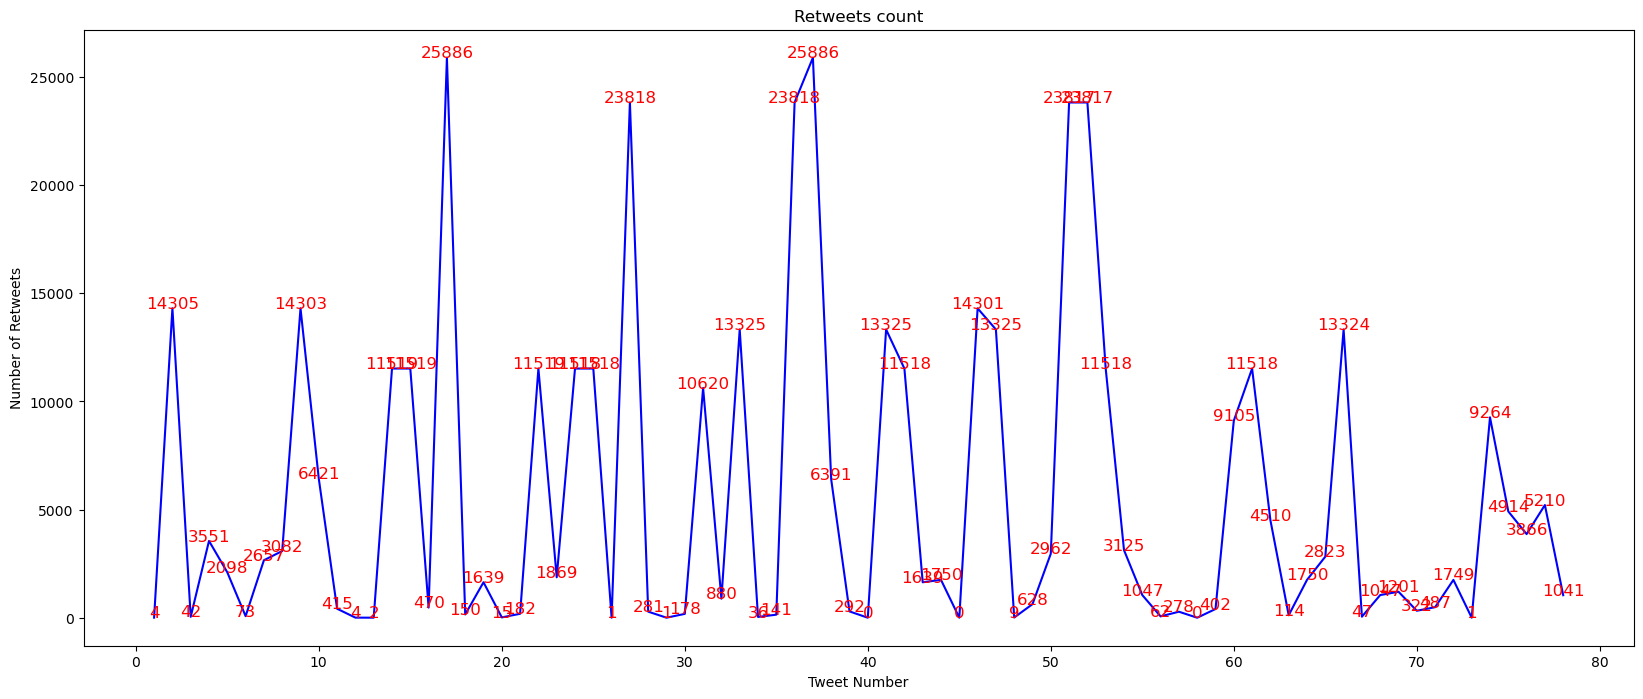

In [59]:
plt.figure(figsize=(20,8))
plt.plot(df_retweets.index,df_retweets.values, color="blue")

plt.xlabel('Tweet Number')
plt.ylabel('Number of Retweets')
plt.title('Retweets count')

for x, y in zip(df_retweets.index, df_retweets.values):
    y= round(int(y),2)
    plt.text(x, y+0.1, str(y), ha='center',color='red',fontsize=12)

In [60]:
count = 0
for i in df_retweets:
    if i > 1000:
        count+=1
print(count)

47


([<matplotlib.patches.Wedge at 0x1b5b0e94a08>,
 [Text(-0.26324721533219847, 1.0680360029605012, 'Neutral'),
  Text(-0.3060391925526493, -1.0565699279374379, 'Positive'),
  Text(0.9526279870751432, -0.5499999256737775, 'Negative')],
 [Text(-0.14358939018119915, 0.5825650925239096, '57.69%\n(45)'),
  Text(-0.1669304686650814, -0.576310869784057, '25.64%\n(20)'),
  Text(0.5196152656773508, -0.2999999594584241, '16.67%\n(13)')])

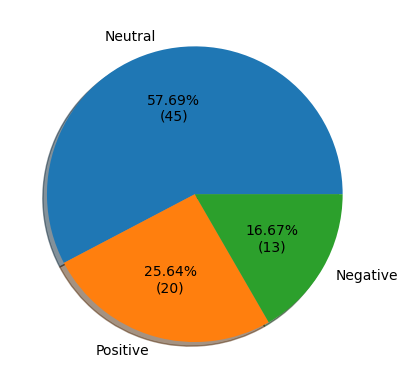

In [61]:
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

v_counts = df_user['sentiment'].value_counts()
total = len(df_user['sentiment'])
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=True)

#### Insights from analysis:
1. 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇵🇸💛💙 junsu / hana user has tweeted most tweets i.e. 78 tweets.
2. This user has location barcaelona which is in Spain and Nadal is also from Spain.
3. This user mentioned Nadal's name i his description.
4. This user tweeted almost every day and most (49) on the 5th June beacuse Nadal won Tennis Championship on that day.
5. His tweets have many retweets as well, considering 47 tweets out of 76 having retweets more than 1000.
6. The sentiments of user's tweet are 26% positive, 17% negative and 58% neutral.